In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
from pymc.Matplot import plot as pmplot

sns.set()

In [2]:
dick = pd.read_pickle('country_data.pkl')

def strip(x):
    return x.replace('\t','')

country_populations = pd.read_csv('world_pop.csv',
                                  sep=';',header=None,index_col=0,names=['population'],
                                        thousands=',',converters={0 : strip})



In [3]:
US = pd.read_pickle('us_state_dict.pkl')
ny = US['New York']
ny.index = pd.DatetimeIndex(ny.index)

dick['New York'] = ny
ny

,confirmed,deceased,inc,dead_inc,factor,dead_factor,density,gdp,pct_dead,conf_per_M,dead_per_M
2020-03-14,525.0,2.0,104.0,2.0,1.247031,NaN,1068.424744,89076,0.380952,27.005521,0.102878
2020-03-15,732.0,3.0,207.0,1.0,1.394286,1.500000,1068.424744,89076,0.409836,37.653413,0.154317
2020-03-16,967.0,10.0,235.0,7.0,1.321038,3.333333,1068.424744,89076,1.034126,49.741598,0.514391
2020-03-17,1706.0,13.0,739.0,3.0,1.764219,1.300000,1068.424744,89076,0.762016,87.755085,0.668708
2020-03-18,2495.0,16.0,789.0,3.0,1.462485,1.230769,1068.424744,89076,0.641283,128.340525,0.823025
2020-03-19,5365.0,34.0,2870.0,18.0,2.150301,2.125000,1068.424744,89076,0.633737,275.970708,1.748929
2020-03-20,8310.0,42.0,2945.0,8.0,1.548928,1.235294,1068.424744,89076,0.505415,427.458823,2.160442
2020-03-21,11710.0,60.0,3400.0,18.0,1.409146,1.428571,1068.424744,89076,0.512383,602.351723,3.086345
2020-03-22,15800.0,117.0,4090.0,57.0,1.349274,1.950000,1068.424744,89076,0.740506,812.737594,6.018373
2020-03-23,20884.0,158.0,5084.0,41.0,1.321772,1.350427,1068.424744,89076,0.756560,1074.253918,8.127376


In [4]:
ita = dick['Italy']
us = dick['US']
swe =dick['Sweden']
ita.tail(60)

,confirmed,factor,inc,deceased,dead_factor,dead_inc,pct_dead,conf_over_dead,dead_conf_ratio
2020-03-14,21157,1.198018,3497.0,1441,1.138231,175.0,6.810985,14.682165,0.950095
2020-03-15,24747,1.169684,3590.0,1809,1.255378,368.0,7.309977,13.679934,1.073263
2020-03-16,27980,1.130642,3233.0,2158,1.192924,349.0,7.712652,12.965709,1.055086
2020-03-17,31506,1.126019,3526.0,2503,1.159870,345.0,7.944519,12.587295,1.030063
2020-03-18,35713,1.133530,4207.0,2978,1.189772,475.0,8.338700,11.992277,1.049617
2020-03-19,41035,1.149021,5322.0,3405,1.143385,427.0,8.297795,12.051395,0.995094
2020-03-20,47021,1.145875,5986.0,4032,1.184141,627.0,8.574892,11.661954,1.033394
2020-03-21,53578,1.139448,6557.0,4825,1.196677,793.0,9.005562,11.104249,1.050225
2020-03-22,59138,1.103774,5560.0,5476,1.134922,651.0,9.259698,10.799489,1.028220
2020-03-23,63927,1.080980,4789.0,6077,1.109752,601.0,9.506155,10.519500,1.026616


In [5]:
countries = ['Sweden','Italy','Spain','US','New York','Germany',
             'Netherlands','Turkey']

dead_df = pd.DataFrame()

for c in countries:
    country = pd.DataFrame(dick[c])
    D = pd.DataFrame(country['dead_inc'])
    
    D['dead_inc'] = D['dead_inc'] / (country_populations.loc[c,'population'] / 1e6)
    
    D.reset_index(inplace=True,drop=True)
    
    zero_or_nan = (D.ne(0) & ~D.isna())
    
    first_non_zero = zero_or_nan.idxmax().values[0]
    
    D = D.loc[first_non_zero:]
    
    D.reset_index(inplace=True,drop=True)
    
    D.rename(columns={'dead_inc' : c},inplace=True)
    
    dead_df = pd.concat([dead_df,D],axis=1)


dead_df.tail(100)


,Sweden,Italy,Spain,US,New York,Germany,Netherlands,Turkey
0,0.099017,0.016539,0.021388,0.003021,0.102828,0.023871,0.058361,0.011857
1,0.000000,0.016539,0.021388,0.000000,0.051414,0.000000,0.000000,0.000000
2,0.000000,0.016539,0.021388,0.015106,0.359897,0.011935,0.116721,0.023714
3,0.099017,0.066157,0.042776,0.003021,0.154242,0.000000,0.000000,0.011857
4,0.099017,0.049618,0.106941,0.012084,0.154242,0.047742,0.058361,0.059285
...,...,...,...,...,...,...,...,...
77,NaN,4.019065,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,3.208636,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,2.728995,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,2.960546,NaN,NaN,NaN,NaN,NaN,NaN


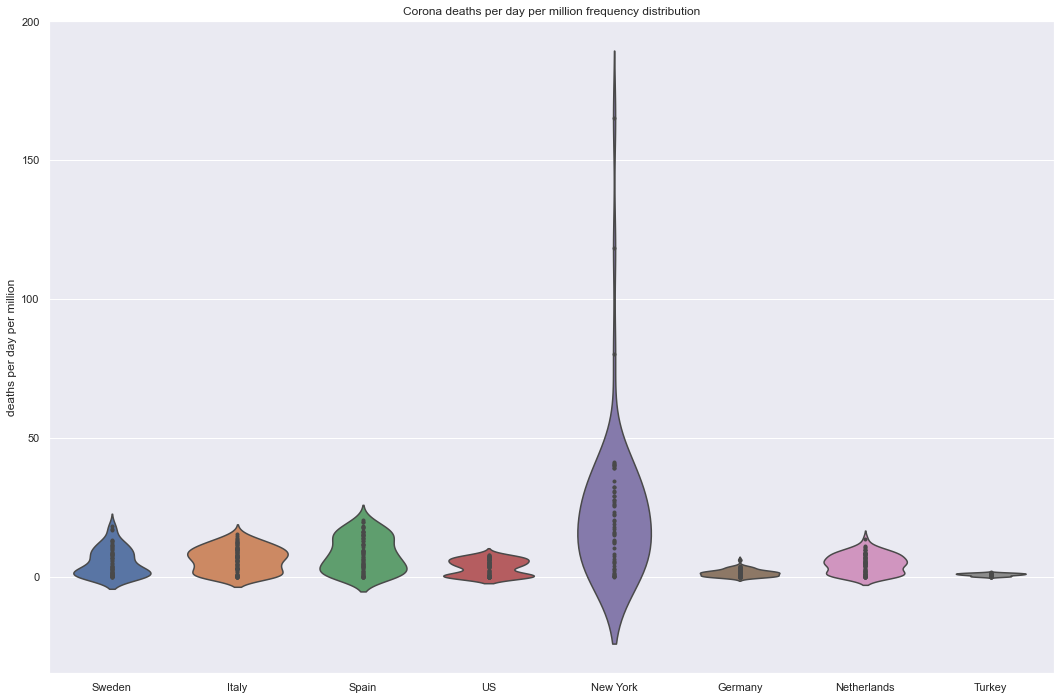

In [6]:
sns.set()
sns.set_style('darkgrid')

plt.figure(figsize=(18,12))
plt.title('Corona deaths per day per million frequency distribution')
plt.ylabel('deaths per day per million')

sns.violinplot(data=dead_df,scale='count',inner='point')
plt.savefig('violin_plot_deaths_per_day.jpg',format='jpg')

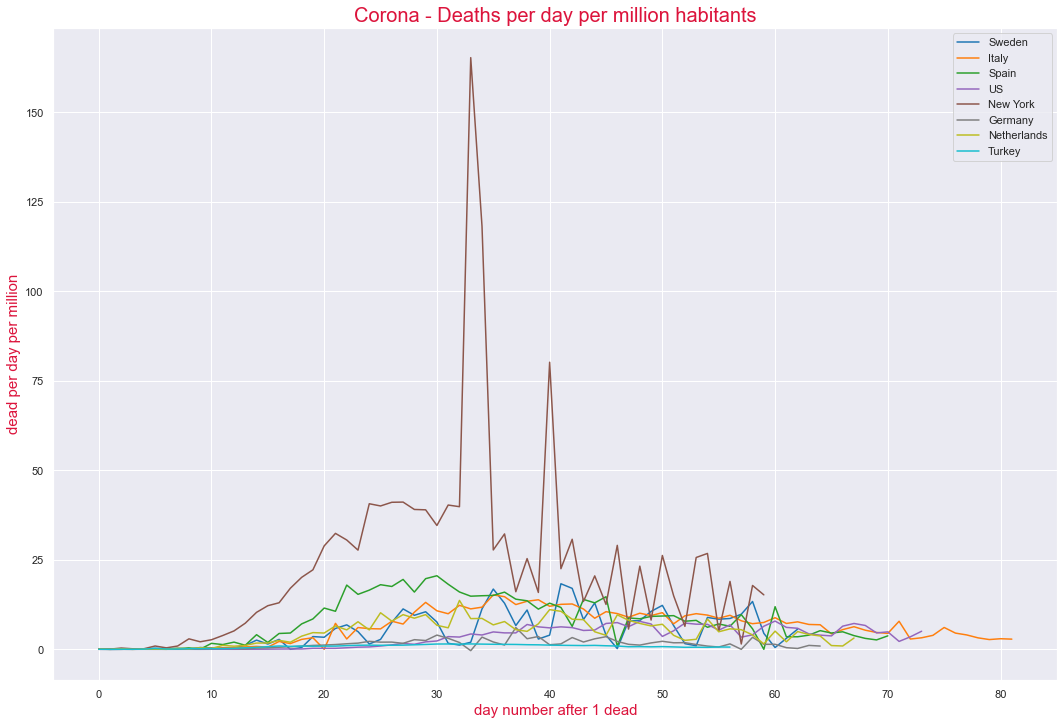

In [7]:
#plt.style.use('whitegrid')
sns.set_style('darkgrid')
dead_df.plot(figsize=(18,12),colormap='tab10')
plt.title('Corona - Deaths per day per million habitants',color='crimson',size=20)
plt.xlabel('day number after 1 dead',color='crimson',size=15)
plt.ylabel('dead per day per million',color='crimson',size=15)
plt.savefig('deaths_per_M_per_day.jpg',format='jpg')


/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encou

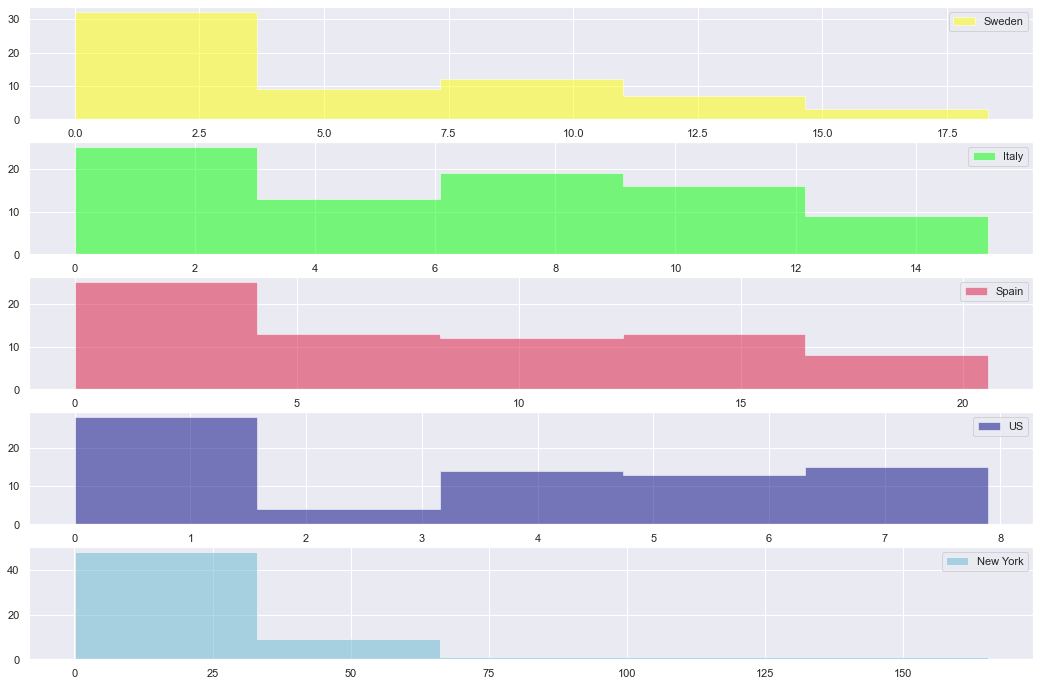

In [8]:
plt.figure(figsize=(18,12))
bins = 5
plt.subplot(511)
plt.hist(dead_df['Sweden'],histtype='stepfilled',color='yellow',alpha=0.5,label='Sweden',bins=bins)
plt.legend(loc='upper right')
plt.subplot(512)
plt.hist(dead_df['Italy'],histtype='stepfilled',color='lime',alpha=0.5,label='Italy',bins=bins)
plt.legend(loc='upper right')
plt.subplot(513)
plt.hist(dead_df['Spain'],histtype='stepfilled',color='crimson',alpha=0.5,label='Spain',bins=bins)
plt.legend(loc='upper right')
plt.subplot(514)
plt.hist(dead_df['US'],histtype='stepfilled',color='navy',alpha=0.5,label='US',bins=bins)
plt.legend(loc='upper right')
plt.subplot(515)
plt.hist(dead_df['New York'],histtype='stepfilled',color='c',alpha=0.5,label='New York',bins=bins)
plt.legend(loc='upper right')